# Titanic: Machine Learning from Disaster

In [1]:
# https://www.kaggle.com/c/titanic

In [2]:
import sklearn
import pandas as pd
import numpy as np

In [3]:
# Загружаем данные из файлов
train = pd.read_csv('./titanic/train.csv')
test = pd.read_csv('./titanic/test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Предобработка данных

In [5]:
# Заполняем пропуски в данных медианными 
# значениями факторов на обучающей выборке
train_median = train.median()
train_imp = train.fillna(train_median)
test_imp = test.fillna(train_median)

In [6]:
train_imp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Бинаризуем категориальные признаки
CATEGORY_COL = ['Sex', 'Pclass', 'Embarked']
train_dummies = pd.get_dummies(train_imp, columns=CATEGORY_COL)
test_dummies = pd.get_dummies(test_imp, columns=CATEGORY_COL)

In [8]:
train_dummies.columns = train_dummies.columns.str.lower()
test_dummies.columns = test_dummies.columns.str.lower()

In [9]:
train_dummies.head()

,passengerid,survived,name,age,sibsp,parch,ticket,fare,cabin,sex_female,sex_male,pclass_1,pclass_2,pclass_3,embarked_c,embarked_q,embarked_s
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,1,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1,0,0,1


In [10]:
#Дополняем фичи инсайтами из прошлого разбора 

train_dummies ['kid']=np.where (train_dummies ['age']<16,1,0)
test_dummies ['kid']=np.where (test_dummies ['age']<16,1,0)

In [11]:
train_dummies ['alone']=np.where ((train_dummies ['sibsp']+train_dummies['parch'])==0,1,0)
test_dummies ['alone']=np.where ((test_dummies ['sibsp']+test_dummies['parch'])==0,1,0)

In [12]:
train_dummies['female_class1']=train_dummies['sex_female']*train_dummies['pclass_1']
train_dummies['female_class2']=train_dummies['sex_female']*train_dummies['pclass_2']
train_dummies['female_class3']=train_dummies['sex_female']*train_dummies['pclass_3']

test_dummies['female_class1']=test_dummies['sex_female']*test_dummies['pclass_1']
test_dummies['female_class2']=test_dummies['sex_female']*test_dummies['pclass_2']
test_dummies['female_class3']=test_dummies['sex_female']*test_dummies['pclass_3']



In [13]:
# Удаляем лишние столбцы
DROP_COL = ['passengerid', 'name', 'ticket', 'cabin', 'sex_female','pclass_3', 'embarked_s']
TARGET_COL = 'survived'
X_train = train_dummies.drop(DROP_COL + [TARGET_COL], axis=1)
y_train = train_dummies[TARGET_COL]
X_test = test_dummies.drop(DROP_COL, axis=1)

In [14]:
age_min = 0
age_max = X_train.age.max()
def normalize_age (age, min=age_min, max=age_max):
    return (age - min)/(max-min)

In [15]:
X_train['age']=X_train.apply(lambda row: normalize_age(row['age']), axis=1)
X_test['age']=X_test.apply(lambda row: normalize_age(row['age']), axis=1)

In [16]:
fare_min = 0
fare_max = X_train.fare.max()
def normalize_fare (fare, min=fare_min, max=fare_max):
    return (age - min)/(max-min)

In [17]:
X_train['fare']=X_train.apply(lambda row: normalize_age(row['fare']), axis=1)
X_test['fare']=X_test.apply(lambda row: normalize_age(row['fare']), axis=1)

In [18]:
X_train.head()

,age,sibsp,parch,fare,sex_male,pclass_1,pclass_2,embarked_c,embarked_q,kid,alone,female_class1,female_class2,female_class3
0,0.2750,1,0,0.090625,1,0,0,0,0,0,0,0,0,0
1,0.4750,1,0,0.891041,0,1,0,1,0,0,0,1,0,0
2,0.3250,0,0,0.099062,0,0,0,0,0,0,1,0,0,1
3,0.4375,1,0,0.663750,0,1,0,0,0,0,0,1,0,0
4,0.4375,0,0,0.100625,1,0,0,0,0,0,1,0,0,0


## Подбор гиперпараметров моделей

In [28]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
from sklearn.svm import LinearSVC

In [35]:
from sklearn.model_selection import GridSearchCV

In [99]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=None)
grid_search = GridSearchCV(estimator=ESTIMATOR, param_grid=PARAM_GRID, scoring='accuracy',
                n_jobs=1, iid=True, refit=True, cv=kfold, verbose=0, 
                pre_dispatch='2*n_jobs', error_score='raise', return_train_score=True)
grid_search.fit (X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=1000, presort='auto', random_state=123,
              subsample=0.75, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [3, 5, 7, 9, 11, 13], 'learning_rate': [0.1, 0.3, 0.5, 0.7, 1]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [58]:
ESTIMATOR = LogisticRegression(random_state = RANDOM_STATE)
PARAM_GRID = [{'penalty':['l1'],'C': [0.01, 0.1, 1, 10, 100, 1000, 10000]}, 
             {'penalty':['l2'],'C': [0.01, 0.1, 1, 10, 100, 1000, 10000]}]

In [60]:
log_reg = grid_search.best_estimator_

In [67]:
ESTIMATOR = KNeighborsClassifier()
PARAM_GRID = [{'n_neighbors': [5, 15,30,60], 'weights':['uniform', 'distance']}]

In [70]:
knn_clf =grid_search.best_estimator_

In [87]:
ESTIMATOR = LinearSVC(random_state = RANDOM_STATE)
PARAM_GRID = [{'penalty':['l2'],'C': [0.01, 0.1, 1, 10, 100, 1000, 10000]}]

In [90]:
lin_svm = grid_search.best_estimator_

In [92]:
ESTIMATOR = RandomForestClassifier(max_features="sqrt",
                               random_state=RANDOM_STATE, n_estimators = 1000)
PARAM_GRID = [{'max_depth': [1,2,3,4,5,6,7,8,9,10]} ]

In [95]:
rnd_frst=grid_search.best_estimator_

In [98]:
ESTIMATOR = GradientBoostingClassifier(max_features="sqrt", loss= 'deviance', 
                               random_state=RANDOM_STATE, n_estimators = 1000,
                                      subsample=0.75)
PARAM_GRID = [{'max_depth': [3,5,7,9,11,13], 
             'learning_rate' : [0.1, 0.3, 0.5,0.7,1]}]

In [100]:
boost=grid_search.best_estimator_

In [101]:
grid_search.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=1000, presort='auto', random_state=123,
              subsample=0.75, verbose=0, warm_start=False)

In [102]:
from sklearn.ensemble import BaggingClassifier 

In [103]:
bgg_clf = BaggingClassifier (log_reg, n_estimators=1000, max_samples=0.75, max_features=0.75
                             ,bootstrap=True, bootstrap_features=True)

# Voting

In [111]:
ESTIMATORS = [('log_reg',log_reg),
              ('knn_clf', knn_clf),
              ('lin_svm',lin_svm),
              ('rnd_frst',rnd_frst),
              ('grad_boost',boost),
              ('bgg_clf',bgg_clf)
             ]

In [112]:
from sklearn.ensemble import VotingClassifier

In [113]:
vote_clf_hard = VotingClassifier(ESTIMATORS, voting='hard')

In [114]:
voting_hard=vote_clf_hard.fit(X_train,y_train)

In [115]:
predicted = voting_hard.predict(X_test)

In [116]:
with open('submission_voting_hard.txt', 'w') as out:
    out.write('PassengerId,Survived\n')
    for passenger, y in zip(test['PassengerId'], predicted):
        out.write('%s,%s\n' % (passenger, y))

In [120]:
ESTIMATORS = [('log_reg',log_reg),
              ('knn_clf', knn_clf),
              ('rnd_frst',rnd_frst),
              ('grad_boost',boost),
              ('bgg_clf',bgg_clf)
             ]

In [121]:
vote_clf_soft = VotingClassifier(ESTIMATORS, voting='soft')

In [122]:
voting_soft=vote_clf_soft.fit(X_train,y_train)

In [123]:
predicted = voting_soft.predict(X_test)

In [124]:
with open('submission_voting_soft.txt', 'w') as out:
    out.write('PassengerId,Survived\n')
    for passenger, y in zip(test['PassengerId'], predicted):
        out.write('%s,%s\n' % (passenger, y))

# Stacking 

In [125]:
def cross_val_predict_proba(estimator, X_train, y_train):
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=None)
    return cross_val_predict(estimator, X_train, y_train, cv=kfold, method='predict_proba')

In [129]:
# получаем предсказания вероятностей ансамблей на кросс-валидации для обучающей выборки
log_reg_train_pred = cross_val_predict_proba(log_reg, X_train, y_train)

knn_clf_train_pred = cross_val_predict_proba(knn_clf, X_train, y_train)

rnd_frst_train_pred = cross_val_predict_proba(rnd_frst, X_train, y_train)

grad_boost_train_pred = cross_val_predict_proba(boost, X_train, y_train)

bgg_clf_train_pred = cross_val_predict_proba(bgg_clf, X_train, y_train)

In [139]:
X_train_stack = np.stack([log_reg_train_pred[:,1]
                          , knn_clf_train_pred[:,1]
                          , rnd_frst_train_pred[:,1]
                          , grad_boost_train_pred[:,1]
                          , bgg_clf_train_pred[:,1]]
                         , axis=1)

In [131]:
# получаем предсказания ансамблей для тестовой выборки

log_reg_test_pred = log_reg.fit(X_train, y_train).predict_proba(X_test)

knn_clf_test_pred = knn_clf.fit(X_train, y_train).predict_proba(X_test)

rnd_frst_test_pred = rnd_frst.fit(X_train, y_train).predict_proba(X_test)

grad_boost_test_pred = boost.fit(X_train, y_train).predict_proba(X_test)

bgg_clf_test_pred = bgg_clf.fit(X_train, y_train).predict_proba(X_test)


In [140]:
X_test_stack = np.stack([log_reg_test_pred[:,1]
                          , knn_clf_test_pred[:,1]
                          , rnd_frst_test_pred[:,1]
                          , grad_boost_test_pred[:,1]
                          , bgg_clf_test_pred[:,1]]
                         , axis=1)

## Объединяем предсказания ансамблей с помощью логистической регрессии

In [141]:
ESTIMATOR = LogisticRegression(random_state = RANDOM_STATE)
PARAM_GRID = [{'penalty':['l1'],'C': [0.01, 0.1, 1, 10, 100, 1000, 10000]}, 
             {'penalty':['l2'],'C': [0.01, 0.1, 1, 10, 100, 1000, 10000]}]

In [143]:
X_train_stack.shape

(891, 5)

In [144]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=None)
grid_search = GridSearchCV(estimator=ESTIMATOR, param_grid=PARAM_GRID, scoring='accuracy',
                n_jobs=1, iid=True, refit=True, cv=kfold, verbose=0, 
                pre_dispatch='2*n_jobs', error_score='raise', return_train_score=True)
grid_search.fit (X_train_stack, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=123, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'penalty': ['l1'], 'C': [0.01, 0.1, 1, 10, 100, 1000, 10000]}, {'penalty': ['l2'], 'C': [0.01, 0.1, 1, 10, 100, 1000, 10000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [145]:
logreg_ensemble_param=grid_search.best_estimator_

In [146]:
logreg_ensemble = logreg_ensemble_param.fit(X_train_stack, y_train)
predicted = logreg_ensemble.predict(X_test_stack)

In [153]:
import matplotlib.pyplot as plt
%matplotlib inline

([<matplotlib.axis.YTick at 0x7f7cc9cb4940>,
 <a list of 5 Text yticklabel objects>)

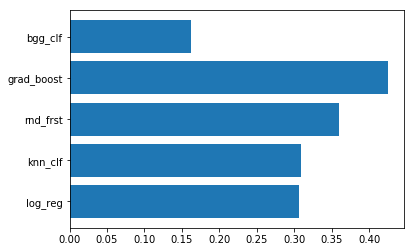

In [154]:
plt.barh( np.arange(len(logreg_ensemble.coef_[0])), logreg_ensemble.coef_[0])
plt.yticks(np.arange(5),['log_reg','knn_clf','rnd_frst', 'grad_boost','bgg_clf'])

## Формируем файл для отправки

In [155]:
with open('submission_stacking.txt', 'w') as out:
    out.write('PassengerId,Survived\n')
    for passenger, y in zip(test['PassengerId'], predicted):
        out.write('%s,%s\n' % (passenger, y))